## CNN
    Convolutional Neural Network, 합성곱 신경망

동물의 시각 정보 처리 방식을 이미지 인식에 적용한 것이다.  
기존의 신경망은 이미지를 잘 다루기 위해 특징을 추출하고, 입력을 1차원 벡터로 만드는 단계가 필요했지만,  
CNN에서는 학습과정에 입력의 특징을 추출하는 방법도 함께 학습하게 된다.  
즉, 컨볼루션 필터를 통해 이미지 일부 영역의 특징을 파악하고 필터와의 합성곱을 통해 전체를 파악해나간다.
+ 필터에 따라 이미지에서 어떤 픽셀들이 강하게 반응하는지가 달라지게 된다.
+ [1, 0, 1,  
0, -4, 0,  
1, 0, 1] => 자기자신은 -4, 대각선 이웃값은 1인 라플리시안 필터의 경우 윤곽선 특징을 추출할 수 있다.  
+ 이미지를 잘 분석하기 위해 어떤 필터를 만들어 특징을 추출해야할까?  
    => 매번 필터를 만들지 말고, 기계가 스스로 좋은 필터를 만들어낼 순 없을까?  
    => 필터의 가중치를 모델의 파라미터로 만들자! => CNN의 기본 아이디어

하나의 필터만으로는 이미지의 특성을 다양하게 추출할 수 없다.  
N개의 필터를 모델의 파라미터로 두고 학습한다면, 하나의 이미지에 대해 N개의 특징 추출 결과를 얻을 수 있다.  
이것을 특성맵(Feature Map)이라 부르며, 이 때 학습해야 할 파라미터는 필터 N개가 가진 모든 요소들의 값이다.

### CNN의 문제점
1. 이미지가 작아진다.
    - 예를들어 6x6 이미지를 3x3 필터로 합성곱 연산했을 때 얻게되는 픽셀은 4x4의 크기가 된다.
    - 필터의 크기가 커질수록 결과는 더욱 더 작아질 것이다.
    - 연결망을 많이 거칠수록, 출력에 가까워질수록 이미지가 매우 작아질 것이다.  
    
    => 이미지 크기를 유지시키기 위해 Padding 사용

2. 특징 추상화 능력
    - 이미지가 작아지면서 이미지 전체의 특성을 잘 요약해낸 것이 아니라,  
    이미지의 가장자리 정보들이 소실되고 중심부의 정보만 살아남는 것으로,   
    정보를 추상화시키는 과정이 아니다.
    - 정보를 요약하지 않으면 입력단계의 작은 노이즈가 가진 영향력도 계속 전파되게 된다.  
    - 노이즈를 제거하기 위해 다수의 픽셀 정보를 통합하여 하나로 만들고, 입력의 변화에 덜 민감한 신호전달을 달성할 수 있다.

    => 정보 요약 계층을 통해 이미지를 적절한 크기로 줄이고, 과적합을 줄이기 위해 Pooling 사용

### Padding
입력 이미지의 주변에 값을 덧대워 채우는 작업이다.  
+ window : 필터가 적용되는 영역, 즉 현재 필터의 위치
+ stride : window가 움직이는 보폭
+ channel : 색상별 강도(흑백은 하나, 컬러는 다수)
    + multi-channel 이미지 하나에 channel이 여러개 존재하고, 필터는 channel별로 따로 만들어진다.
    + 각 channel * filter의 합성곱 결과는 모두 합산되어 최종결과 이미지에 기록된다.

### Pooling
이미지의 일정 영역 내의 픽셀들이 가진 값을 하나로 축소하는 연산이다.  
원래 이미지가 가지고 있던 채널을 그대로 유지하면서 공간만 줄이는 작업이다.
+ max pooling : 풀링 적용 영역 내에서 가장 큰 값을 결과로 선택
+ mean pooling : 풀링 적용 영역 내 평균을 구해 결과로 선택

입력의 변화에 덜 민감하기 때문에, 이동불변성(translation invariance)을 가지며  
이동불변성을 가진 모델을 강건한(robust) 모델이라고 하며, 강건한 모델은 과적합을 피할 수 있는 능력이 크다.

인공신경망 계층의 convlution layer, pooling layer를 통해  
모델 파라미터의 개수를 효율적으로 줄일 수 있고, 전체 모델 복잡도가 감소하는 효과를 얻을 수 있다.  
CNN은 이 두 layer를 쌓아나가는 형태로 인공신경망을 구성할 수 있다.

c:\Users\yeonok\anaconda3\envs\deeplearning\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\yeonok\anaconda3\envs\deeplearning\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\yeonok\anaconda3\envs\deeplearning\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %
C:\Users\yeonok\AppData\Local\Temp/ipykernel_15648/1150157070.py:6: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  david = mpimg.imread(url)


(109, 120, 4)


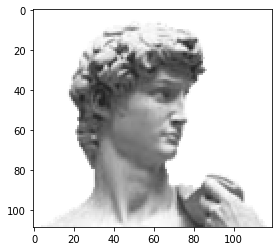

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

url = 'https://github.com/dknife/ML/raw/main/data/image/david.png'
david = mpimg.imread(url)

print(david.shape)   #(109, 120, 4) => 4채널 이미지
plt.imshow(david);

In [2]:
def padding(image, padding_size):   #np.pad 함수 사용
    padded_image = np.pad(array=image, 
                          pad_width=((padding_size, padding_size), (padding_size, padding_size), (0,0)),   #padding_size만큼 덧댐
                          mode='constant', constant_values=0)
    return padded_image

(113, 124, 4)


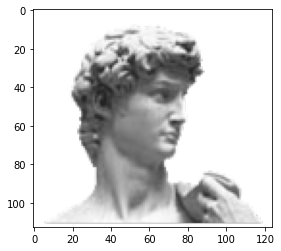

In [3]:
padded_david = padding(david, 2)

print(padded_david.shape)    #(113, 124, 4) => 채널 제외 4씩 증가
plt.imshow(padded_david);

In [4]:
#필터 적용 함수
def apply_filter(small_region, filter):
    conv = np.multiply(small_region, filter)
    return np.sum(conv)

#전체 이미지를 슬라이딩 하면서 apply_filter 함수를 적용하는 함수
def convolution(image, filter):
    row, col, channels = image.shape
    filter_width, filter_height = filter.shape
    thickness_row, thickness_col = (filter_width-1) // 2, (filter_height-1) // 2   #필터의 두께(중심점~끝)
    
    start = np.array([thickness_row, thickness_col])
    end = np.array([row, col]) - start
    #print(start, end, filter_width, filter_height)
    
    conv_img = np.zeros((row-(thickness_row*2), col-(thickness_col*2), channels))
    
    for channel in range(channels):
        for i in range(start[0], end[0]):
            for j in range(start[1], end[1]):
                conv_img[i-thickness_row, j-thickness_col, channel] = apply_filter(
                                    image[i-thickness_row:i+thickness_row+1, j-thickness_col:j+thickness_col+1, channel], filter)
    return conv_img

In [5]:
#상자필터 : 특정 픽셀 주변 값들의 평균을 취하는 필터(=평균필터)
box_filter = np.array([[1/9, 1/9, 1/9],
                       [1/9, 1/9, 1/9],
                       [1/9, 1/9, 1/9]])

#라플라시안 필터 : 외곽선 추출하는 필터
laplacian_filter = np.array([[1, 0, 1],
                      [0, -4, 0],
                      [1, 0, 1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


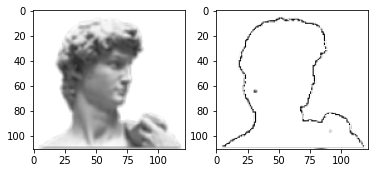

In [6]:
box_conv_david = convolution(padded_david, box_filter)
laplacian_conv_david = convolution(padded_david, laplacian_filter)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(box_conv_david)         #원본에 비해 흐려짐
ax2.imshow(laplacian_conv_david);  #윤곽선을 추출해냄 

### CNN 모델의 구성
패딩을 고려한 합성곱과 풀링이 순차적으로 이뤄지게 하는 것이 CNN의 신호연결이다.  
이 과정에 파라미터로 사용되는 것이 합성곱 필터의 가중치들이다.  
합성곱과 풀링이 반드시 번갈아 진행될 필요는 없으나, 풀링만으로 연결될 수는 없다.(정보를 줄이기만 할뿐이기 때문)  


필터 개수에 따라 합성곱 단계를 거쳐 몇 장의 이미지를 얻게 될지가 결정된다.(하나의 필터가 하나의 이미지를 생성)  
이 때 패딩 여부에 따라 이미지의 크기가 결정되며, 채널 수는 그대로 유지된다.  
이렇게 CNN을 통해 얻은 최종 이미지를 다층 퍼셉트론 형태의 전통적 신경망에 연결해야 한다.  
이를 위해 최종 이미지를 1차원 벡터로 만드는 flatten 과정을 거쳐야 한다.  
이렇게 얻은 1차원 벡터가 전통적 신경망의 input이 되고, 이후엔 Dense를 이용하여 최종 출력까지 신경망을 연결하면 된다.

In [7]:
#model = keras.models.Sequential([keras.layers.Conv2D(input_shape=(64,64,3),                          #최초의 합성곱 계층에는 입력이미지의 shape 알려줘야함
#                                                     kernel_size=(3,3), filters=32),                 #필터 사이즈, 필터 개수
#                                 keras.layers.MaxPooling2D((2,2), strides=2),                        #풀링 적용 영역 크기, stride 지정
#                                 keras.layers.Conv2D(kernel_size=(3,3), padding='same', filters=64), #same : 출력이미지 크기가 입력과 같도록 유지, valid : 패딩 사용하지 않음
#                                 ...])  


#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model.fit(x_train, y_train, epochs=10, validation_split=0.25)   #CNN의 입력은 (데이터 인스턴스 개수, row 개수, col 개수, 채널 수)의 형태로 제공해야 함

### CNN의 성공
CNN의 고전적 버전은 손글씨 인식을 위한 LeNet-5 모델이며,   
모델학습을 위해 구축된 2만2천개 범주의 1500만장 이미지로 구성된 ImageNet 데이터베이스는 오늘날의 딥러닝 기술을 발전시키는 데 크게 기여했다.  
CNN 모델이 각광받게 된 계기는 2012년 ImageNet의 경진대회에서 CNN구조인 AlexNet이 압도적으로 우승한 일이었다.  
2011년까지는 인간이 고안한 방식으로 데이터의 특징을 추출해왔는데, 작은 성능 개선도 어려운 상태였다.  
그런데 AlexNet이 10% 감소된 오차율을 보이며 등장해 신경망의 화려한 부활을 선언하게 된 것이다.  
이후 인공 신경망 모델은 이미지 인식 분야에서 다른 기술들을 압도하며 주류를 차지하게 된다.  

#### CNN이 이전의 신경망을 크게 개선할 수 있었던 이유는?
1. 희소 상호작용(sparse interaction)
    - CNN 모델은 국소적인 영역에 작은 필터를 적용하여 특징을 추출한다. 
    - 따라서 입력 이미지의 모든 픽셀들 사이의 관계를 다룰 필요가 없게 된다.  
    => 신경망 사이 연결 개수를 크게 줄일 수 있다.

2. 파라미터 공유(parameter sharing)
    - 여러 영역에 적용되는 합성곱 필터는 많은 수의 데이터를 처리해도 작은 크기로 유지될 수 있고, 파라미터 수도 제한적이다.
    - 적은 수의 파라미터를 모든 영역에 적용하는 것 = 신호를 다음 계층으로 연결할 때 같은 파라미터를 공유하여 쓰는 것  
    => 신경망 연산의 핵심은 weight를 곱하는 것이라는 점에서, 파라미터 공유는 연산량을 감소시키고, 더 깊은 층을 쌓을 수 있도록 한다.

3. 등변성 표현(equivariant representation)
    - 등변성 : 어떤 함수의 입력에 특정한 변경을 적용하면, 출력도 같은 방식으로 변하는 것
    - 등변성을 갖는 함수를 등변함수라고 한다.
    - CNN은 이미지의 일부가 이동하면 그 결과가 같은 방식으로 이동하여 나타나게 된다.  
    => 외곽선 추출 같은 국소적인 함수가 이미지의 어느 부분에서나 효과를 발휘할 수 있다.
    - 유의할 점은 이미지 크기 변화, 회전 등에 대해서는 합성곱 연산이 등변성을 보이지 못한다. => 캡슐 신경망 개념 등장

### Quiz.
CNN과 다층 퍼셉트론을 이용하여 패션 MNIST 데이터를 분류해보자.  
두 방법을 비교하고, 얼마나 성능이 개선되는지 확인해보자.

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#CNN 이용
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('데이터 형태 : ', x_train.shape, x_test.shape)
print(f'레이블 : {sorted(y_train)[0]} ~ {sorted(y_train)[-1]}')

데이터 형태 :  (60000, 28, 28) (10000, 28, 28)
레이블 : 0 ~ 9


In [9]:
#fashion mnist의 이미지들은 하나의 채널로 이루어진 회색조 이미지 => 채널 수 1이 되도록 입력데이터 변형
x_train = x_train[:, :, :, np.newaxis]   #(60000, 28, 28, 1)
x_test = x_test[:, :, :, np.newaxis]     #(10000, 28, 28, 1)

In [10]:
model = keras.models.Sequential([keras.layers.Conv2D(input_shape=(28,28,1),
                                                     kernel_size=(3,3), filters=32, padding='same'),
                                 keras.layers.MaxPooling2D((2,2), strides=2),
                                 keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same'),
                                 keras.layers.MaxPooling2D((2,2), strides=2),
                                 keras.layers.Conv2D(kernel_size=(3,3), filters=32, padding='same'),   #여기까지 CNN, 이제 펼쳐서 신경망의 입력으로 넘기기
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(32, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    epochs=15, validation_split=0.25)

Epoch 1/15
1407/1407 [==============================] - 18s 13ms/step - loss: 0.8017 - accuracy: 0.7980 - val_loss: 0.4008 - val_accuracy: 0.8583
Epoch 2/15
1407/1407 [==============================] - 18s 13ms/step - loss: 0.3611 - accuracy: 0.8707 - val_loss: 0.3360 - val_accuracy: 0.8833
Epoch 3/15
1407/1407 [==============================] - 18s 13ms/step - loss: 0.3135 - accuracy: 0.8871 - val_loss: 0.3529 - val_accuracy: 0.8740
Epoch 4/15
1407/1407 [==============================] - 18s 13ms/step - loss: 0.2979 - accuracy: 0.8938 - val_loss: 0.3331 - val_accuracy: 0.8819
Epoch 5/15
1407/1407 [==============================] - 18s 13ms/step - loss: 0.2865 - accuracy: 0.8982 - val_loss: 0.3277 - val_accuracy: 0.8885
Epoch 6/15
1407/1407 [==============================] - 18s 13ms/step - loss: 0.2657 - accuracy: 0.9054 - val_loss: 0.3492 - val_accuracy: 0.8837
Epoch 7/15
1407/1407 [==============================] - 18s 13ms/step - loss: 0.4950 - accuracy: 0.8523 - val_loss: 0.3135 -

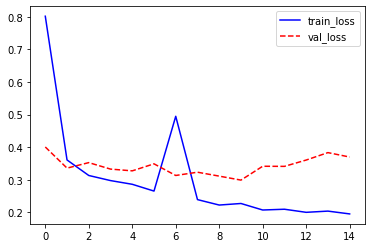

In [12]:
plt.plot(history.history['loss'], 'b-', label='train_loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend();

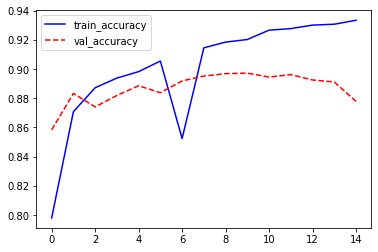

In [14]:
plt.plot(history.history['accuracy'], 'b-', label='train_accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend();

In [15]:
model.evaluate(x_test, y_test, verbose=2)   #loss, acc

313/313 - 1s - loss: 0.3882 - accuracy: 0.8765


[0.38821160793304443, 0.8765000104904175]

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ancle boot']

rand_idx = np.random.randint(0, 1000)
random_images = x_test[rand_idx:rand_idx+25]
y_pred = np.argmax(model.predict(random_images), axis=1)

y_pred

array([7, 4, 8, 3, 3, 4, 4, 3, 4, 9, 6, 2, 3, 9, 1, 8, 1, 7, 5, 5, 6, 0,
       2, 1, 0], dtype=int64)

In [17]:
def plot_images(images, labels, images_per_row=5):    #한줄에 이미지 5개씩
    n_images = len(images)
    n_rows = ((n_images-1) // images_per_row) + 1     #5개씩 몇줄이 될지 계산
    fig, ax = plt.subplots(n_rows, images_per_row, figsize=(images_per_row*2, n_rows*2))
    
    for i in range(n_rows):
        for j in range(images_per_row):
            if i*images_per_row + j > n_images:
                break
            img_idx = i*images_per_row + j
            a_image = images[img_idx].reshape(28,28)
            if n_rows > 1:
                axis = ax[i, j]
            else:
                axis = ax[j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            label = class_names[labels[img_idx]]
            axis.set_title(label)
            axis.imshow(a_image, interpolation='nearest')

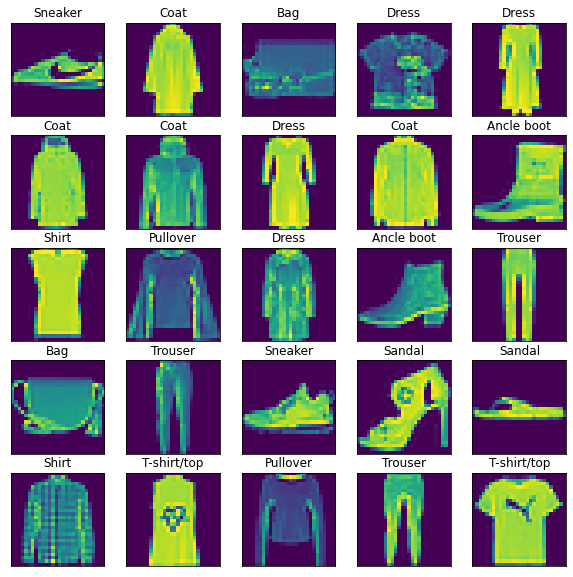

In [18]:
plot_images(random_images, y_pred)

### 성능좋은 CNN을 가져다 써보자
Keras내에는 ImageNet 경진대회에서 성능이 입증된 모델들을 제공한다.
- Xception, VGG16, VGG19, ResNet, ResNetV2, ResNeXt,
- InceptionV3, InceptionResNetV2, MobileNet, MobileNetV2, DenseNet, NASNet


keras.applications.inception_v3 서브모듈 사용해 InceptionV3 모델로 mnist를 분류해보자.
+ InceptionV3의 최소 입력 크기는 75*75

In [19]:
import tensorflow
from skimage.transform import resize
from tensorflow.keras.applications.inception_v3 import preprocess_input, InceptionV3
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import RMSprop

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [20]:
#정규화
x_train = x_train / 255
x_test = x_test / 255

#28*28 => InceptionV3의 최소입력크기 75*75로 변환
#우선 변환된 이미지들을 담을 빈 행렬 준비
x_train_process  = np.zeros((x_train.shape[0], 75, 75, 3),    #(60000, 75, 75, 3)
                            dtype=np.float32)
x_test_process  = np.zeros((x_test.shape[0], 75, 75, 3),     #(10000, 75, 75, 3)
                            dtype=np.float32)

#각 이미지 resize 후 채널 3개 생성 => (75, 75, 3) 
for i, image in enumerate(x_train):
    resized_image = resize(image, (75, 75), anti_aliasing=True)       #(28, 28) 형태인 image를 (75, 75)로 resize, 그래픽의 계단현상(aliasing) 제거
    #stack(shape이 동일한 배열들을 지정된 axis 방향으로 쌓음) 함수 사용(stack([a, b], axis=-1) = dstack([a, b]))
    x_train_process[i] = np.dstack([resized_image, resized_image, resized_image])  
    
for i, image in enumerate(x_test):
    resized_image = resize(image, (75, 75), anti_aliasing=True)
    x_test_process[i] = np.dstack([resized_image, resized_image, resized_image])

In [21]:
pre_trained_model = InceptionV3(input_shape=(75, 75, 3),
                                include_top=False,        #네트워크의 마지막 계층에 맨 위 완전연결계층을 포함할지 여부
                                weights=None)             #임의의 난수값으로 가중치 초기화

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

아주 많은 합성곱, 풀링층이 쌓여있고, 전체 파라미터가 약 2180만개인 것을 볼 수 있다.  

이제 InceptionV3 모델을 어느 layer까지 사용할 것인지 결정해야 한다.  
만약 mixed7 까지 사용하기로 한다면, 우선 마지막 계층을 얻어와야 한다.  
그리고 그 계층의 출력을 펼친 것을 입력으로 사용하는 레이어를 시작으로 다시 연결해나간다.  

In [22]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)    #입력신호를 생성하는 계층을 새로운 계층에 연결해 만들기
x = layers.Dense(10, activation='softmax')(x)

final_model = Model(pre_trained_model.input, x)

final_model.compile(optimizer=RMSprop(lr=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

final_model.fit(x_train_process, y_train, epochs=20,
                validation_data=(x_test_process, y_test))

Epoch 1/20
1875/1875 [==============================] - 673s 359ms/step - loss: 0.3873 - accuracy: 0.9247 - val_loss: 5.9565 - val_accuracy: 0.9120
Epoch 2/20
1875/1875 [==============================] - 664s 354ms/step - loss: 0.1126 - accuracy: 0.9790 - val_loss: 0.0457 - val_accuracy: 0.9879
Epoch 3/20
1875/1875 [==============================] - 664s 354ms/step - loss: 0.0947 - accuracy: 0.9844 - val_loss: 0.0440 - val_accuracy: 0.9876
Epoch 4/20
1875/1875 [==============================] - 668s 356ms/step - loss: 0.0938 - accuracy: 0.9867 - val_loss: 9.3386 - val_accuracy: 0.9566
Epoch 5/20
1875/1875 [==============================] - 664s 354ms/step - loss: 0.0729 - accuracy: 0.9885 - val_loss: 0.0473 - val_accuracy: 0.9912
Epoch 6/20
1875/1875 [==============================] - 657s 351ms/step - loss: 0.0649 - accuracy: 0.9904 - val_loss: 0.3137 - val_accuracy: 0.9887
Epoch 7/20
1875/1875 [==============================] - 654s 349ms/step - loss: 0.0791 - accuracy: 0.9899 - val_

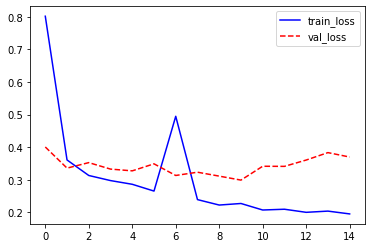

In [23]:
plt.plot(history.history['loss'], 'b-', label='train_loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend();

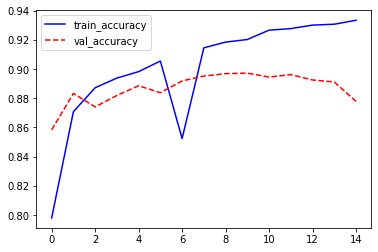

In [25]:
plt.plot(history.history['accuracy'], 'b-', label='train_accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend();

훈련데이터, 검증데이터에 대해 모두 높은 정확도로 예측하는 좋은 모델이 생성되었다.  
##### 그러나...
InceptionV3 는 매우 복잡한 모델이기 때문에, 새로 훈련시키는 데에 시간이 너무 많이 걸린다.  
그리고 이미 방대한 양의 데이터로 학습된 모델인데 weights=None으로 초기화하고 전체를 새롭게 학습하고 있기 때문에,  
이전의 학습을 활용하고 있지 않은 것이다.  
#### => 전이학습(transfer learning)
이미 학습이 완료된 모델을 다른 목적에 맞춰 조금만 고쳐서 사용하는 것이다.  
그런데 사전학습에 사용된 데이터와 다른 형태의 데이터에 대해 예측하는 경우가 대부분이므로,  
이미 사전학습된 모델을 특징 추출 용도로 사용하고, 그 특징 추출기의 output을 이용하여 원하는 작업을 수행하는 구조로 바꾸면 될 것이다.  

In [28]:
pre_trained_model = InceptionV3(input_shape=(75,75,3),
                                include_top=False,
                                weights='imagenet')   #훈련된 가중치 사용

for layer in pre_trained_model.layers:
    layer.trainable = False   #사전학습된 모델의 모델 layer에 대해 파라미터 고정
    
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

final_model = Model(pre_trained_model.input, x)
final_model.compile(optimizer=RMSprop(lr=0.0005),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_285 (Conv2D)             (None, 37, 37, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 37, 37, 32)   96          conv2d_285[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 37, 37, 32)   0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

InceptionV3가 2000만개가 넘는 파라미터를 학습하는 모델이었다면  
전이학습으로 고친 모델에서는 전체 파라미터 940만개, 그 중 44만개의 파라미터를 학습하므로  
학습 속도가 대폭 상향될 것이다.

In [29]:
history = final_model.fit(x_train_process, y_train, epochs=20,
                validation_data=(x_test_process, y_test))

Epoch 1/20
1875/1875 [==============================] - 126s 67ms/step - loss: 0.1103 - accuracy: 0.9668 - val_loss: 0.0464 - val_accuracy: 0.9858
Epoch 2/20
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0414 - val_accuracy: 0.9855
Epoch 3/20
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0357 - accuracy: 0.9891 - val_loss: 0.0329 - val_accuracy: 0.9893
Epoch 4/20
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0314 - accuracy: 0.9911 - val_loss: 0.0369 - val_accuracy: 0.9887
Epoch 5/20
1875/1875 [==============================] - 125s 66ms/step - loss: 0.0283 - accuracy: 0.9918 - val_loss: 0.0492 - val_accuracy: 0.9866
Epoch 6/20
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 0.0411 - val_accuracy: 0.9885
Epoch 7/20
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0214 - accuracy: 0.9938 - val_loss: 0

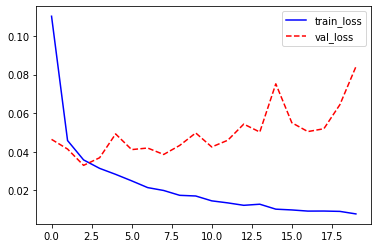

In [30]:
plt.plot(history.history['loss'], 'b-', label='train_loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend();

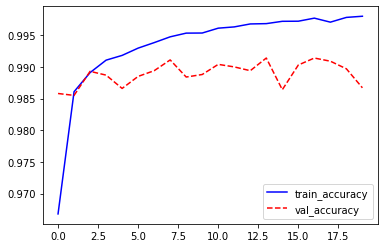

In [31]:
plt.plot(history.history['accuracy'], 'b-', label='train_accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend();
#훈련 초기부터 검증데이터에 대한 정확도가 높게 나타남

전이학습을 이용하면 데이터 개수가 적어 훈련이 어려운 경우에도 효과적으로 특징을 추출하여 좋은 결과를 낼 수 있음을 알 수 있다.